# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('/content/hasil_clustering.csv')
print(df.dtypes)

TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                float64
CustomerOccupation          object
TransactionDuration        float64
LoginAttempts              float64
AccountBalance             float64
PreviousTransactionDate     object
CustomerAgeGroup           float64
Cluster                      int64
PCA1                       float64
PCA2                       float64
dtype: object


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
# Menghapus Kolom Kategorikal
df = df.drop(columns=['TransactionID', 'AccountID', 'TransactionDate', 'DeviceID',
                      'IP Address', 'MerchantID', 'PreviousTransactionDate'], errors='ignore')

X = df.drop(columns=['Cluster'])  # fitur
y = df['Cluster']  # label (kelas)

# Encoding Kolom Kategorikal
label_encoders = {}
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Split data ke training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [4]:
# Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Accuracy: 0.9821
F1 Score: 0.9821

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       172
           1       0.98      0.99      0.99       276

    accuracy                           0.98       448
   macro avg       0.98      0.98      0.98       448
weighted avg       0.98      0.98      0.98       448



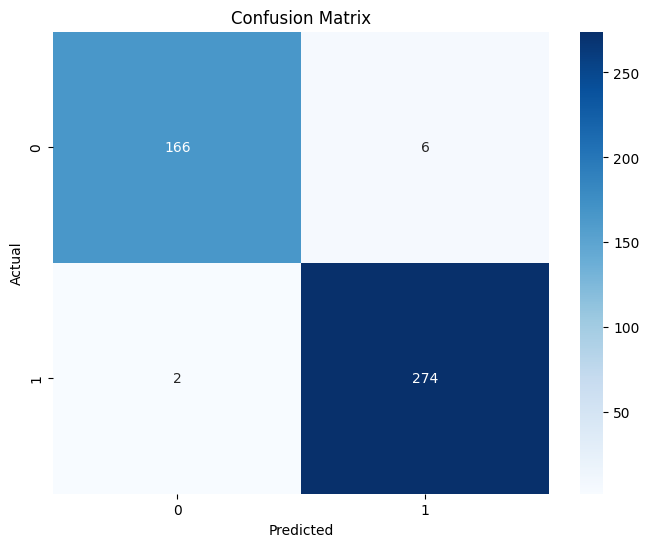

In [5]:
y_pred = model.predict(X_test)

# Metrik Evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [6]:
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy :", model.score(X_test, y_test))

Train Accuracy: 1.0
Test Accuracy : 0.9821428571428571


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

### Kelemahan Model

* Kelas 0 →	Model berhasil mengenali sebagian besar data aktual.

* Kelas 1 sangat baik → menunjukkan bahwa model sedikit lebih condong mengenali kelas 0. (Recall 0.98).

* Precision(kelas0:0.99, kelas1:0.98)	Hampir semua prediksi benar untuk kedua kelas. False positives sangat rendah.

* Akurasi pada data latih mencapai 100%, sedangkan data uji hanya 98%. model mungkin mengalami sedikit overfit

### Tindakan Lanjutan

* Feature Importance Analysis:
Lihat fitur mana yang paling berpengaruh, mungkin ada fitur yang bisa dikurangi atau ditingkatkan.

* Kumpulkan data tambahan. Terutama untuk kelas yang memiliki jumlah instance sedikit atau kasus yang sulit dikenali.